In [118]:
import requests
import pandas as pd
from tqdm import tqdm
baseurl = "https://www.dnd5eapi.co"

response = requests.get(baseurl + "/api/2014/monsters")

monsters = response.json()
monsters = monsters['results']
monsterframe = pd.DataFrame(monsters)

print(monsterframe.head())

                index                name  \
0             aboleth             Aboleth   
1             acolyte             Acolyte   
2  adult-black-dragon  Adult Black Dragon   
3   adult-blue-dragon   Adult Blue Dragon   
4  adult-brass-dragon  Adult Brass Dragon   

                                     url  
0             /api/2014/monsters/aboleth  
1             /api/2014/monsters/acolyte  
2  /api/2014/monsters/adult-black-dragon  
3   /api/2014/monsters/adult-blue-dragon  
4  /api/2014/monsters/adult-brass-dragon  


In [ ]:
monsterframe["full_url"] = baseurl + monsterframe["url"]

df_monsters_details = pd.DataFrame()
for index, row in tqdm(monsterframe.iterrows()):
    url = row["full_url"]
    response = requests.get(url)
    response_json = response.json()
    allowed_keys = []
    for key, value in response_json.items():
        if isinstance(value, (str, int, float)):
            allowed_keys.append(key)
    filtered_dict = {key: response_json[key] for key in allowed_keys if key in response_json}
    df_temp = pd.DataFrame(filtered_dict, index=[0])
    df_monsters_details = pd.concat([df_monsters_details, df_temp], axis=0)


df_monsters_details = df_monsters_details.reset_index(drop=True)

334it [02:33,  2.18it/s]


In [121]:
df_monsters_details.to_csv("monsters.csv")

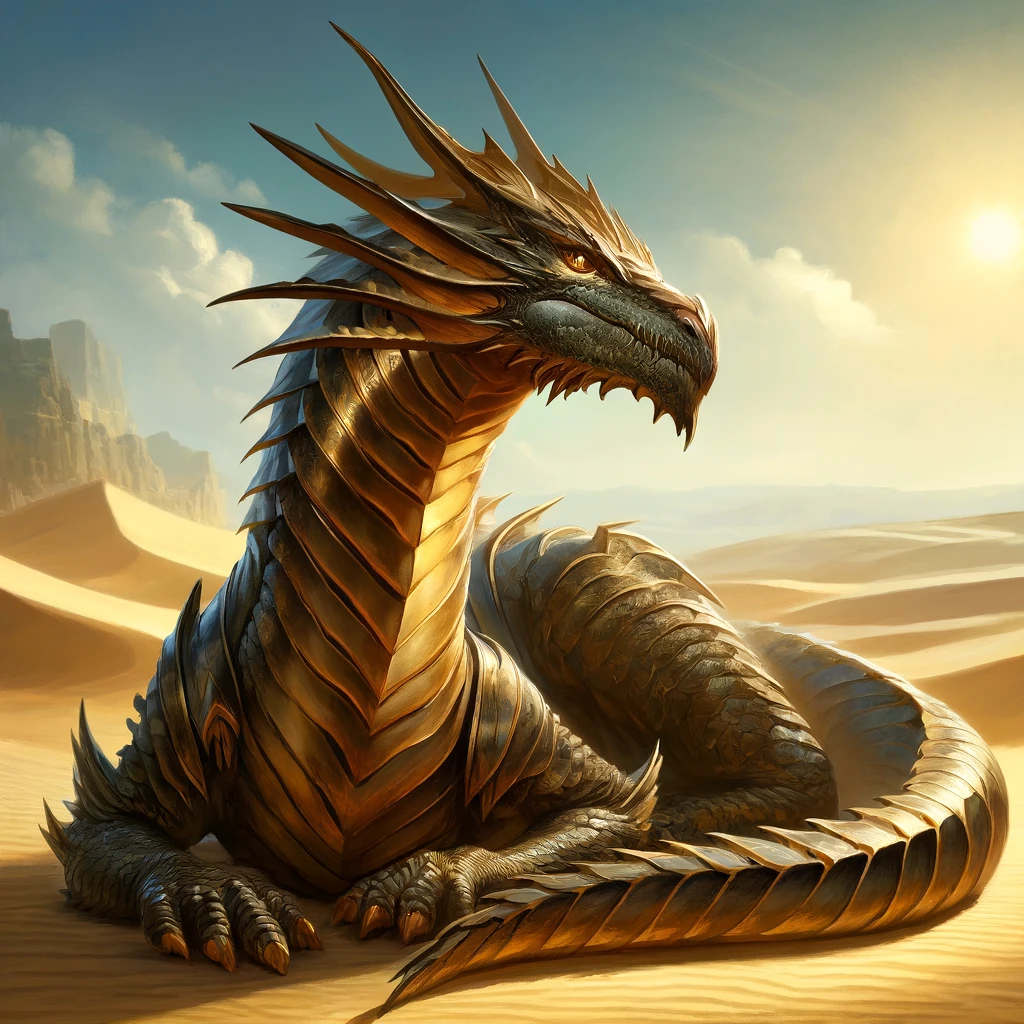

In [ ]:
from PIL import Image
from io import BytesIO

# Load the image
img = requests.get(baseurl + df_monsters_details["image"][0])
# Convert response content into an image
image = Image.open(BytesIO(img.content))

display(image)

In [57]:
def clean_values_in_dict(dnd_dict):
    for key, value in dnd_dict.items():
        if (type(value) == list):
            print(key)
            print(len(value))
            print(value)

response = requests.get(monsterframe["full_url"][0])
clean_values_in_dict(response.json())

armor_class
1
[{'type': 'natural', 'value': 17}]
proficiencies
5
[{'value': 6, 'proficiency': {'index': 'saving-throw-con', 'name': 'Saving Throw: CON', 'url': '/api/2014/proficiencies/saving-throw-con'}}, {'value': 8, 'proficiency': {'index': 'saving-throw-int', 'name': 'Saving Throw: INT', 'url': '/api/2014/proficiencies/saving-throw-int'}}, {'value': 6, 'proficiency': {'index': 'saving-throw-wis', 'name': 'Saving Throw: WIS', 'url': '/api/2014/proficiencies/saving-throw-wis'}}, {'value': 12, 'proficiency': {'index': 'skill-history', 'name': 'Skill: History', 'url': '/api/2014/proficiencies/skill-history'}}, {'value': 10, 'proficiency': {'index': 'skill-perception', 'name': 'Skill: Perception', 'url': '/api/2014/proficiencies/skill-perception'}}]
damage_vulnerabilities
0
[]
damage_resistances
0
[]
damage_immunities
0
[]
condition_immunities
0
[]
special_abilities
3
[{'name': 'Amphibious', 'desc': 'The aboleth can breathe air and water.', 'damage': []}, {'name': 'Mucous Cloud', 'desc'

In [131]:
baseurl = "https://www.dnd5eapi.co"

response2 = requests.get(baseurl + "/api/2014/spells")

spells = response2.json()
spells = spells['results']
spellframe = pd.DataFrame(spells)

print("so far it worked")

spellframe["full_url"] = baseurl + spellframe["url"]
print(spellframe["full_url"][0])
df_spells_details = pd.DataFrame()
print(df_spells_details)
for index, row in (spellframe.iterrows()):
    url = row["full_url"]
    response2 = requests.get(url)
    response2_json = response2.json()
    allowed_keys2 = []
    for key, value in response2_json.items():
        if isinstance(value, (str, int, float)):
            allowed_keys2.append(key)
    filtered_dict2 = {key: response2_json[key] for key in allowed_keys2 if key in response2_json}
    df_temp2 = pd.DataFrame(filtered_dict2, index=[0])
    df_spells_details = pd.concat([df_spells_details, df_temp2], axis=0)


df_spells_details = df_spells_details.reset_index(drop=True)

print(df_spells_details.head())

so far it worked
https://www.dnd5eapi.co/api/2014/spells/acid-arrow
Empty DataFrame
Columns: []
Index: []
         index         name    range  \
0   acid-arrow   Acid Arrow  90 feet   
1  acid-splash  Acid Splash  60 feet   
2          aid          Aid  30 feet   
3        alarm        Alarm  30 feet   
4   alter-self   Alter Self     Self   

                                        material  ritual       duration  \
0  Powdered rhubarb leaf and an adder's stomach.   False  Instantaneous   
1                                            NaN   False  Instantaneous   
2                   A tiny strip of white cloth.   False        8 hours   
3   A tiny bell and a piece of fine silver wire.    True        8 hours   
4                                            NaN   False   Up to 1 hour   

   concentration casting_time  level attack_type  \
0          False     1 action      2      ranged   
1          False     1 action      0         NaN   
2          False     1 action      2         N

In [132]:
df_spells_details.to_csv("spells.csv")